In [2]:
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.datasets import make_gaussian_quantiles
from sklearn import ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
X,Y = make_classification(n_samples = 10000, n_features = 12, 
                     n_informative = 10, n_classes = 5, random_state = 0)
print(X.shape)
print(Y.shape)

(10000, 12)
(10000,)


In [55]:
mat = pd.concat([X,Y], axis = 1)
mat.columns = np.array(['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10',
                         'x11','x12','Response'])
mat.head(5)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,Response
0,-0.688345,-1.075180,-0.873586,-1.701409,-0.475668,-0.337594,6.458754,2.522792,-2.704778,-0.313492,0.913817,-2.204570,1
1,-0.948226,1.890486,0.823396,-5.157182,-0.011269,0.850086,-4.276484,0.251554,0.384607,-0.338518,5.234188,1.289072,2
2,-0.591366,1.265194,-0.135395,-3.817360,-0.388317,3.953922,-2.223434,0.057389,-0.280091,-2.596458,0.446851,2.000516,2
3,-3.754970,5.348505,0.551291,4.557593,3.180973,-4.178560,7.251974,5.981264,-0.453378,1.017465,-0.819630,-2.480946,0
4,-0.451108,-2.828674,0.811837,-7.326255,0.291742,-0.479579,5.860254,-2.611893,0.278501,-4.525027,-0.047749,-3.127627,3


In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3)

In [4]:
score = np.array([])
for j in np.arange(20) + 2:
    mod_reg = tree.DecisionTreeClassifier(max_depth = j)
    mod_cv = cross_val_score(mod_reg, X_train,Y_train, 
                             cv = 10)
    score = np.append(score, np.mean(mod_cv))
    print("j->", j, "Mean->", np.mean(mod_cv))
param = np.argmax(score) + 2
param

j-> 2 Mean-> 0.372709005126182
j-> 3 Mean-> 0.44256655459315486
j-> 4 Mean-> 0.4709938248110285
j-> 5 Mean-> 0.5138506905978246
j-> 6 Mean-> 0.5629959252596051
j-> 7 Mean-> 0.5967209392737052
j-> 8 Mean-> 0.6241536780206282
j-> 9 Mean-> 0.640280267970222
j-> 10 Mean-> 0.6439912784041011
j-> 11 Mean-> 0.6511384507362351
j-> 12 Mean-> 0.6491290734452633
j-> 13 Mean-> 0.6528425422207078
j-> 14 Mean-> 0.6505576291177319
j-> 15 Mean-> 0.6548411162577882
j-> 16 Mean-> 0.6481392618340933
j-> 17 Mean-> 0.64698987112523
j-> 18 Mean-> 0.6505562218113788
j-> 19 Mean-> 0.6504182597522027
j-> 20 Mean-> 0.6488413154085344
j-> 21 Mean-> 0.6457033393501054


15

In [5]:
mod_reg = tree.DecisionTreeClassifier(max_depth = param)
mod_reg_fit = mod_reg.fit(X_train,Y_train)
error = mod_reg_fit.score(X_test,Y_test)
print(param)
print("Error - > ", error)

#mod = tree.DecisionTreeRegressor(max_depth = 3)
#mod.fit(X_train, Y_train)
#plt.figure(figsize = (12,12))
#tree.plot_tree(mod)
#plt.show()  

15
Error - >  0.6476666666666666


In [6]:
Y_predict = mod_reg_fit.predict(X_train)
print(classification_report(Y_train, Y_predict))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1390
           1       0.95      0.98      0.96      1372
           2       0.98      0.98      0.98      1393
           3       0.99      0.98      0.98      1436
           4       0.97      0.97      0.97      1409

    accuracy                           0.97      7000
   macro avg       0.97      0.97      0.97      7000
weighted avg       0.97      0.97      0.97      7000



In [7]:
Y_predict = mod_reg_fit.predict(X_test)
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.63      0.68      0.66       608
           1       0.64      0.58      0.61       628
           2       0.69      0.71      0.70       612
           3       0.65      0.65      0.65       565
           4       0.62      0.61      0.62       587

    accuracy                           0.65      3000
   macro avg       0.65      0.65      0.65      3000
weighted avg       0.65      0.65      0.65      3000



In [8]:
score = np.array([])
for j in np.arange(8) + 2:
    mod_reg = ensemble.GradientBoostingClassifier(max_depth = j)
    mod_cv = cross_val_score(mod_reg, X_train,Y_train, 
                             cv = 10)
    score = np.append(score, np.mean(mod_cv))
    print("j->", j, "Mean->", np.mean(mod_cv))
param = np.argmax(score) + 2
param

j-> 2 Mean-> 0.6852681855606753
j-> 3 Mean-> 0.7412661145968287
j-> 4 Mean-> 0.7871227929497303
j-> 5 Mean-> 0.8102651098086119
j-> 6 Mean-> 0.8152628762638976
j-> 7 Mean-> 0.8205476059921933
j-> 8 Mean-> 0.8258357704286521
j-> 9 Mean-> 0.8262659861880073


9

In [9]:
mod_reg_boost = ensemble.GradientBoostingClassifier(max_depth = param)
mod_reg_boost_fit = mod_reg_boost.fit(X_train,Y_train)
error = mod_reg_boost_fit.score(X_test,Y_test)
print(param)
print("Error - > ", error)

9
Error - >  0.84


In [10]:
Y_predict = mod_reg_boost_fit.predict(X_train)
print(classification_report(Y_train, Y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1390
           1       1.00      1.00      1.00      1372
           2       1.00      1.00      1.00      1393
           3       1.00      1.00      1.00      1436
           4       1.00      1.00      1.00      1409

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



In [11]:
Y_predict = mod_reg_boost_fit.predict(X_test)
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       608
           1       0.83      0.83      0.83       628
           2       0.87      0.85      0.86       612
           3       0.87      0.81      0.84       565
           4       0.79      0.87      0.83       587

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.84      0.84      0.84      3000



In [12]:
score = np.array([])
for j in np.arange(25) + 10:
    mod_reg = ensemble.RandomForestClassifier(max_depth = j,
                                             max_features = 4,
                                             n_estimators = 200,
                                             oob_score = True)
    mod_reg.fit(X,Y)
    error = np.append(error, mod_reg.oob_score_)
    print("j->", j, "Mean->", mod_reg.oob_score_)
param = np.argmax(error) + 2
param

j-> 10 Mean-> 0.7959
j-> 11 Mean-> 0.8071
j-> 12 Mean-> 0.8198
j-> 13 Mean-> 0.8259
j-> 14 Mean-> 0.8314
j-> 15 Mean-> 0.8315
j-> 16 Mean-> 0.8321
j-> 17 Mean-> 0.8314
j-> 18 Mean-> 0.8335
j-> 19 Mean-> 0.8368
j-> 20 Mean-> 0.8322
j-> 21 Mean-> 0.834
j-> 22 Mean-> 0.8346
j-> 23 Mean-> 0.8337
j-> 24 Mean-> 0.8336
j-> 25 Mean-> 0.8318
j-> 26 Mean-> 0.8351
j-> 27 Mean-> 0.8373
j-> 28 Mean-> 0.836
j-> 29 Mean-> 0.8321
j-> 30 Mean-> 0.8322
j-> 31 Mean-> 0.8338
j-> 32 Mean-> 0.8352
j-> 33 Mean-> 0.8365
j-> 34 Mean-> 0.8316


2

In [13]:
mod_reg_rf = ensemble.RandomForestClassifier(max_depth = param,
                                             max_features = 4,
                                             n_estimators = 100,
                                             oob_score = True)
mod_reg_rf_fit = mod_reg_rf.fit(X,Y)
error = mod_reg_rf_fit.score(X_test,Y_test)
print(param)
print("Error - > ", error)

2
Error - >  0.479


In [14]:
Y_predict = mod_reg_rf_fit.predict(X_train)
print(classification_report(Y_train, Y_predict))

              precision    recall  f1-score   support

           0       0.47      0.62      0.54      1390
           1       0.23      0.00      0.01      1372
           2       0.52      0.68      0.59      1393
           3       0.59      0.58      0.58      1436
           4       0.39      0.53      0.45      1409

    accuracy                           0.49      7000
   macro avg       0.44      0.48      0.43      7000
weighted avg       0.44      0.49      0.44      7000



In [15]:
Y_predict = mod_reg_rf_fit.predict(X_test)
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.46      0.62      0.53       608
           1       0.27      0.00      0.01       628
           2       0.52      0.69      0.59       612
           3       0.59      0.58      0.58       565
           4       0.38      0.53      0.44       587

    accuracy                           0.48      3000
   macro avg       0.45      0.48      0.43      3000
weighted avg       0.44      0.48      0.43      3000



In [16]:
score = np.array([])
for j in np.arange(20) + 2:
    mod_reg = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth = j), 
                                         n_estimators = 100)
    mod_cv = cross_val_score(mod_reg, X_train,Y_train, 
                             cv = 10)
    score = np.append(score, np.mean(mod_cv))
    print("j->", j, "Mean->", np.mean(mod_cv))
param = np.argmax(score) + 2
param

j-> 2 Mean-> 0.6468502752210223
j-> 3 Mean-> 0.6784240568314956
j-> 4 Mean-> 0.7037069704261243
j-> 5 Mean-> 0.7298548211531617
j-> 6 Mean-> 0.7599812597682665
j-> 7 Mean-> 0.7832745953576312
j-> 8 Mean-> 0.8105499815268089
j-> 9 Mean-> 0.8235584086780158
j-> 10 Mean-> 0.8344055773999578
j-> 11 Mean-> 0.8345605002127512
j-> 12 Mean-> 0.8355588518152632
j-> 13 Mean-> 0.8374082465167231
j-> 14 Mean-> 0.836407827288793
j-> 15 Mean-> 0.8396974509121172
j-> 16 Mean-> 0.8405550036676394
j-> 17 Mean-> 0.8456995068905548
j-> 18 Mean-> 0.8418449935021997
j-> 19 Mean-> 0.8418443908896366
j-> 20 Mean-> 0.8100282635952472
j-> 21 Mean-> 0.774897829532354


17

In [17]:
mod_reg_ada = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth = param), 
                                         n_estimators = 100)
mod_reg_ada_fit = mod_reg_ada.fit(X_train,Y_train)
error = mod_reg_ada_fit.score(X_test,Y_test)
print(param)
print("Error - > ", error)

17
Error - >  0.8413333333333334


In [18]:
X1, y1 = make_gaussian_quantiles(cov = 2, n_samples=200, n_features=2, 
                                 n_classes=2, random_state=1)

In [19]:
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5, n_samples=300, n_features=2,
n_classes=2, random_state=1)

In [20]:
X = np.concatenate((X1, X2))
y = np.concatenate((y1, -y2 + 1))

In [21]:
cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

cmaps['Sequential (2)'] = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']

NameError: name 'cmaps' is not defined

In [ ]:
plt.figure(figsize = (12,7))
plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.Paired)
plt.show()

In [13]:
mod = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1),
                         algorithm="SAMME",
                         n_estimators=200)
mod.fit(X,y);

In [14]:
x_min = X[:, 0].min() - 1
x_max = X[:, 0].max() + 1
y_min = X[:, 1].min()
y_max = X[:, 1].max() + 1
x_list = np.arange(x_min, x_max, 0.02)
y_list = np.arange(y_min, y_max, 0.02)
xx, yy = np.meshgrid(x_list, y_list)

In [15]:
new_grid = np.c_[xx.ravel(), yy.ravel()]
z = mod.predict(new_grid)
z = z.reshape(xx.shape)
z

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

No handles with labels found to put in legend.


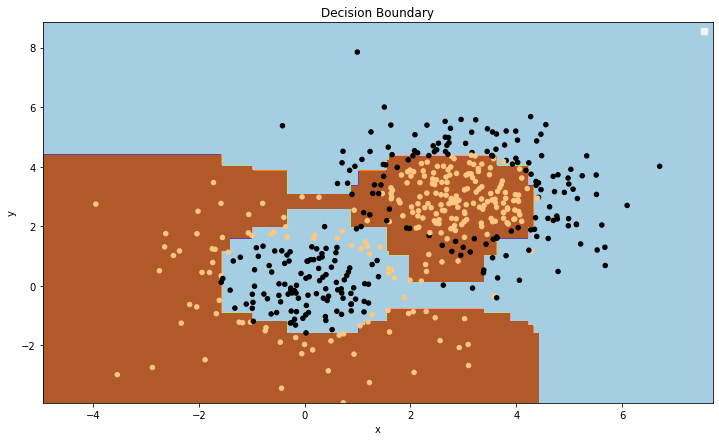

In [94]:
plt.figure(figsize = (12,7))
cs = plt.contourf(xx, yy, z, cmap = plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c = y, 
            cmap=plt.cm.copper, 
            s=20)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')
plt.show()

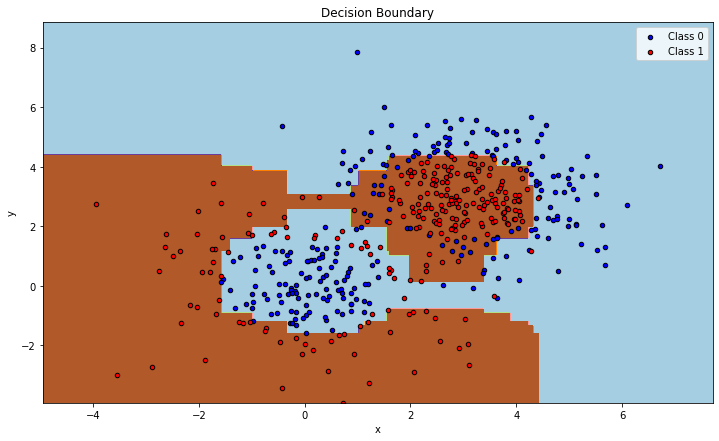

In [95]:
plot_colors = "br"
class_names = "01"
tt = zip(range(2), class_names, plot_colors)

plt.figure(figsize = (12,7))
cs = plt.contourf(xx, yy, z, cmap = plt.cm.Paired)
for label, cl, color in tt:
    idx = np.where(y == label)
    plt.scatter(X[idx, 0], X[idx, 1], c = color, cmap = plt.cm.Paired,s=20, 
                label = "Class %s" %cl, edgecolor = "k")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')
plt.show()

In [96]:
twoclass_output = mod.decision_function(X)
twoclass_output

array([-1.52495383e-01,  3.74967454e-01,  1.91712404e-01,  2.54462568e-01,
        3.40096445e-01,  3.21659832e-01, -5.01693643e-02, -1.36485144e-01,
        3.29912218e-01,  5.33761016e-02, -9.78681809e-02,  3.29912218e-01,
        1.91712404e-01, -1.36485144e-01,  9.85209250e-02,  1.91712404e-01,
        3.40096445e-01,  5.33761016e-02,  8.25024550e-02,  4.28975758e-02,
       -1.20222197e-02, -1.36485144e-01, -5.01693643e-02, -1.52495383e-01,
       -1.52495383e-01, -7.64833880e-02, -8.00474725e-02, -5.10477942e-02,
        1.00104778e-02,  6.83365679e-02, -1.39899864e-02,  9.95928007e-02,
       -5.10477942e-02,  9.19348788e-03, -2.39742326e-02, -4.65400448e-02,
       -6.60050464e-02,  1.85678085e-01, -1.52495383e-01,  1.91712404e-01,
       -1.52495383e-01,  2.30329367e-01,  2.01688324e-01, -1.52495383e-01,
       -1.05089160e-01, -4.50939372e-02,  1.91712404e-01,  2.34837117e-01,
       -1.05089160e-01,  2.01688324e-01, -1.52495383e-01, -1.36485144e-01,
       -5.10477942e-02,  

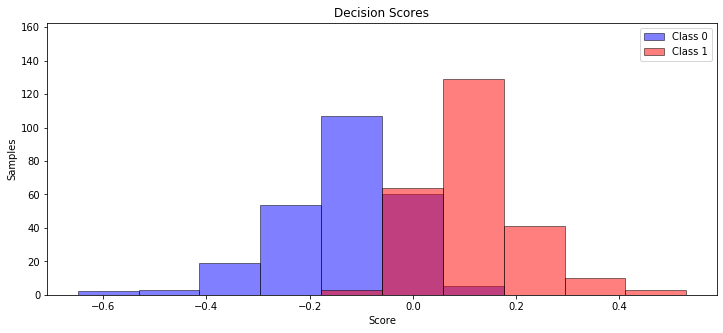

In [98]:
plot_range = (twoclass_output.min(), twoclass_output.max())

plt.figure(figsize = (12,5))
for label, cl, color in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == label], bins = 10, range = plot_range,
             facecolor = color, label = 'Class %s' % cl, alpha=.5, edgecolor='k')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')
plt.show()

In [3]:
from sklearn import svm

In [4]:
mod_svm = svm.LinearSVC()
mod_svm

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [5]:
mod_svm.fit(X,y);
new_grid = np.c_[xx.ravel(), yy.ravel()]
z = mod_svm.predict(new_grid)
z = z.reshape(xx.shape)
z

NameError: name 'X' is not defined

In [6]:
plt.figure(figsize = (12,7))
cs = plt.contourf(xx, yy, z, cmap = plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c = y, 
            cmap=plt.cm.copper, 
            s=20)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')
plt.show()

NameError: name 'xx' is not defined

<Figure size 864x504 with 0 Axes>

In [57]:
mod_svm_rbf = svm.SVC(kernel = "rbf")
mod_svm_rbf

NameError: name 'svm' is not defined

In [111]:
mod_svm_rbf.fit(X,y);
new_grid = np.c_[xx.ravel(), yy.ravel()]
z = mod_svm_rbf.predict(new_grid)
z = z.reshape(xx.shape)
z

C:\Users\apoghosyan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

No handles with labels found to put in legend.


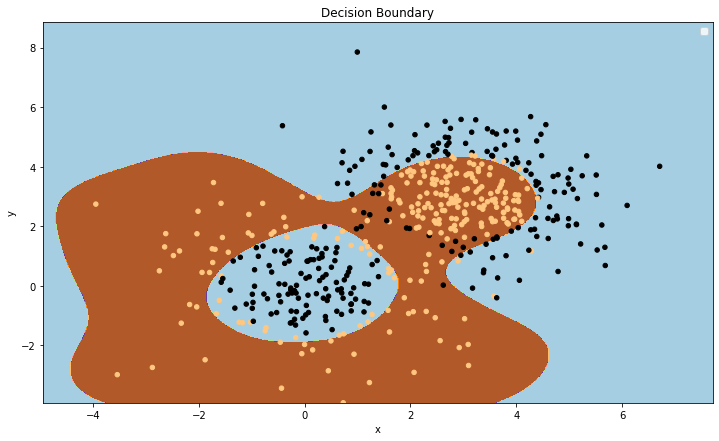

In [112]:
plt.figure(figsize = (12,7))
cs = plt.contourf(xx, yy, z, cmap = plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c = y, 
            cmap=plt.cm.copper, 
            s=20)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc = 'upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')
plt.show()

In [16]:
mod_svm_poly = svm.SVC(kernel = "poly")
mod_svm_poly

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

C:\Users\apoghosyan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
No handles with labels found to put in legend.


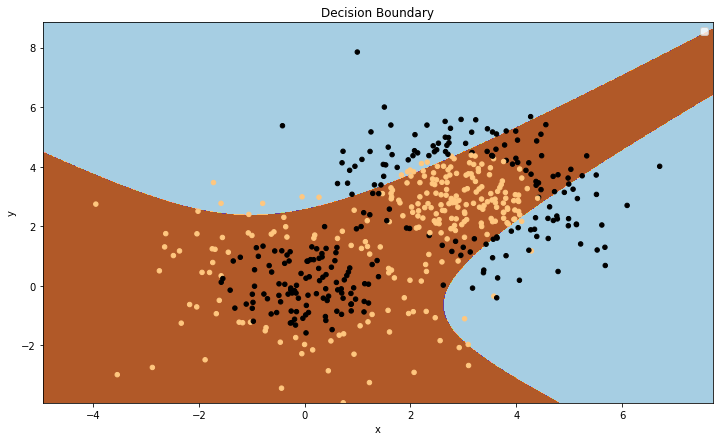

In [17]:
mod_svm_poly.fit(X,y);
new_grid = np.c_[xx.ravel(), yy.ravel()]
z = mod_svm_poly.predict(new_grid)
z = z.reshape(xx.shape)
z


plt.figure(figsize = (12,7))
cs = plt.contourf(xx, yy, z, cmap = plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c = y, 
            cmap=plt.cm.copper, 
            s=20)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')
plt.show()